In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_spss("./Data/private_landlord_survey/UKDA-8455-spss/spss/spss24/epls_2018_forarchive.sav")

In [5]:
df = df[["serial_2", # Unique Identifier
        "LLCat1", # LL org category
        "LLeth2cat", # LL ethnicity
        "Age4cat", # LL Age
        "ValperPrpA", # Avg mkt val per prop
        "MktValgrpA", # Mkt val all props
        "BTL", # Buy to let loan/other
        "LnperPrpA", # Avg loan per prop
        "LnValgrpA", # Total val all loans
        "LTVgrpA", # LTV market val
        "TmLLgrpB", # How long been LL
        "LLExp", # Length experience as LL
        "NumPrpgrp", # How many props
        "RtIncgrpa", # Gross rental inc
        "LLIncgrpA", # Total LL inc no rent
        "TotIncgrp", # Total LL inc
        "RtPrIncgrpA", # Rent as prop. inc
        "Port_size", # Portfolio size
        "LLEmpl01", # Emp. Status: FT
        "LLEmpl02", # Emp. Status: PT
        "LLEmpl03", # Emp. Status: Self-employed as LL
        "LLEmpl04", # Emp. Status: Self-employed
        "LLEmpl05", # Emp. Status: Retired
        "LLEmpl06", # Emp. Status: Company director
        "LLEmpl07", # Emp. Status: Student
        "LLEmpl08", # Emp. Status: FT carer
        "LLEmpl09", # Emp. Status: Unemployed
        "LLOrg1", # LL Org: National LLs Assc.
        "LLOrg2", # LL Org: Residential LL Assc.
        "LLOrg3", # LL Org: Other professional
        "LLOrg4", # LL Org: None
        "AgOrg1", # Rental Org: ARLA
        "AgOrg2", # Rental Org: NAEA
        "AgOrg3", # Rental Org: NALS
        "AgOrg4", # Rental Org: UKALA
        "AgOrg5", # Rental Org: Other
        "AgOrg6", # Rental Org: None
        "Regprop01", # Prop Region: East England
        "Regprop02", # Prop Region: East Midlands
        "Regprop03", # Prop Region: Inner London
        "Regprop04", # Prop Region: Outer London
        "Regprop05", # Prop Region: North East
        "Regprop06", # Prop Region: North West
        "Regprop07", # Prop Region: South East
        "Regprop08", # Prop Region: South West
        "Regprop09", # Prop Region: West Midlands
        "Regprop10", # Prop Region: Yorkshire/Humber
        "LLInfo01", # Where info: Letting Agent
        "LLInfo02", # Where info: LL membership ass. or org
        "LLInfo03", # Where info: Online landlord forums/websites
        "LLInfo04", # Where info: Gov't websites
        "LLInfo05", # Where info: Family/friends
        "LLInfo06", # Where info: Online media
        "LLInfo07", # Where info: TV
        "LLInfo08", # Where info: Radio
        "LLInfo09", # Where info: Newspapers
        "AgtuseA1", # Agent use: For letting svcs
        "AgtuseA2", # Agent use: For mgmt svcs
        "AgtuseA3", # Agent use: None
        "FutVac", # Next Vacancy will relet
        "FutProp", # Next two years, plan
        "FutRLv1", # LL leave/reduce: Financial
        "FutRLv2", # LL leave/reduce: Personal
        "FutRLv3", # LL leave/reduce: Legislative
        "FutRLv4", # LL leave/reduce: Other
        "FutRLv5", # LL leave/reduce: None
        "FutRLv6", # LL leave/reduce: Don't Know
        "FutInc1", # LL Increase/maintain: Financial
        "FutInc2", # LL Increase/maintain: Personal
        "FutInc3", # LL Increase/maintain: Legislative
        "FutInc4", # LL Increase/maintain: Other
        "FutInc5", # LL Increase/maintain: None
        "FutInc6", # LL Increase/maintain: Don't know
        "LLPmb1", # LL Serious problems: Financial
        "LLPmb2", # LL Serious problems: Legislative
        "LLPmb3", # LL Serious problems: Tenant behaviour
        "LLPmb4", # LL Serious problems: Other
        "LLPmb5", # LL Serious problems: None
        "Lntyp1", # Current loan: B2L mort
        "Lntyp2", # Current loan: Commercial loan
        "Lntyp3", # Current loan: Family/friends
        "Lntyp4", # Current loan: No debt
        "Lntyp5", # Current loan: Other
        "TaxB201", # Awareness: Stamp duty increase
        "TaxB202", # Awareness: Reduced tax relief
        "TaxB203", # Awareness: Reduced CG tax non-prop
        "TaxB204", # Awareness: Change wear/tear allow
        "TaxB205", # Awareness: Change minimum rent B2L mort
        "TaxB206", # Awareness: Letting agent fee ban
        "TaxB207", # Awareness: Tax treatment foreign prop own
        "TaxB208", # Awareness: None
        "TaxB301", # As above but understanding
        "TaxB302",
        "TaxB303",
        "TaxB304",
        "TaxB305",
        "TaxB306",
        "TaxB307",
        "EPCEFG", # Any props. w/ EPC rating E, F or G
        "EPCE", # Awareness: EPC requirements
        "LetReq03"] # Requirement: EPC Certificate]
]

df["serial_2"] = df["serial_2"].astype("int")

In [6]:
def get_stats(df: pd.DataFrame, col: str, percent:bool = True) -> pd.DataFrame:
    df_stats = df[col].value_counts().to_frame()
    if percent == True:
        f = lambda a : round(a / len(df[df[col].notna()].index), 4)
        df_stats = df_stats.applymap(f)
    return df_stats

## Target Market identification

- Total market of LLs
    - Not corporate

In [7]:
for i in df['LLCat1'].unique():
    print(i)

As an individual or group of individuals
Other (please specify)
As part of a company
nan


In [19]:
tgt_mkt = df[(df["LLCat1"].isin(['As an individual or group of individuals', 'Other (please specify)']))]

In [20]:
tgt_len = len(tgt_mkt.index)
df_len = len(df[(df["LLCat1"].notna())].index)

print(f" Target market: {tgt_len} \n Total market: {df_len} \n Percentage of total market: {round((tgt_len/df_len)*100,2)}%")

 Target market: 6278 
 Total market: 6695 
 Percentage of total market: 93.77%


get_stats(tgt_mkt, "NumPrpgrp")

In [10]:
get_stats(tgt_mkt, "NumPrpgrp")

,count
NumPrpgrp,
2 to 4,0.4201
1 only,0.2391
5 to 9,0.2024
10 to 24,0.1100
25 to 100,0.0272
more than 100,0.0011


In [11]:
get_stats(tgt_mkt, "ValperPrpA")

,count
ValperPrpA,
"£200,000 to £499,999",0.4070
"£100,000 to £129,999",0.1439
"£150,000 to £179,999",0.1246
"£500,000 and over",0.0877
"£130,000 to £149,999",0.0609
"£80,000 to £99,999",0.0545
"£50,000 to £79,999",0.0527
"£180,000 to £199,999",0.0444
"up to £49,999",0.0242


In [14]:
df_stats = get_stats(tgt_mkt, "MktValgrpA")
df_stats

,count
MktValgrpA,
"£200,000 to £499,999",0.2931
"£500,000 to £999,999",0.2704
"£1,000,000 to £1,999,999",0.1702
"£100,000 to £199,999",0.1053
"£2,000,000 to £2,999,999",0.0581
"£6,000,000 or more",0.0284
"less than £100,000",0.0266
"£3,000,000 to £3,999,999",0.0253
"£4,000,000 to £4,999,999",0.0149


In [15]:
df_stats = get_stats(tgt_mkt, "MktValgrpA")
df_stats["medmktval"] = [
    (500000+999999)/2,
    (200000+499999)/2,
    (1000000+1999999)/2,
    (100000+199999)/2,
    (2000000+2999999)/2,
    (100000)/2,
    (3000000+3999999)/2,
    6000000,
    (4000000+4999999)/2,
    (5000000+5999999)/2
]

pd.DataFrame(df_stats["count"].multiply(df_stats["medmktval"])).sum()

0    1.086530e+06
dtype: float64

Note: LTV is as a proportion of market value of portfolio

In [21]:
tgt_mkt["LTVgrpA"] = tgt_mkt.LTVgrpA.cat.add_categories(['0%'])
tgt_mkt.loc[tgt_mkt["Lntyp4"] == "Yes", "LTVgrpA"] = "0%"
df_stats = get_stats(tgt_mkt, "LTVgrpA")
df_stats

/tmp/ipykernel_3016/4196019641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt_mkt["LTVgrpA"] = tgt_mkt.LTVgrpA.cat.add_categories(['0%'])


,count
LTVgrpA,
0%,0.3657
50 to 59%,0.1115
60 to 69%,0.0950
40 to 49%,0.0870
30 to 39%,0.0710
20 to 29%,0.0630
70 to 79%,0.0575
1 to 9%,0.0482
10 to 19%,0.0473


## Estimates

Let's make estimates!
- NumPrpgrp
- ValperPrpA
- MktValgrpA
- LTVgrpA

Actually, let's do NumPrp from the mkt_val and valperprp!
Orig stats:
```
count    5787.000000
mean        0.227969
std         0.789743
min        -0.828571
25%        -0.113333
50%         0.073333
75%         0.400000
max        30.000000
```
Averaging a 22% difference from what we'd expect.

In [7]:
band_mapping = {
    '1 only': 1,
    '2 to 4': 3,
    '5 to 9': 7,
    '10 to 24': 17,
    '25 to 100': 62,
    'more than 100': 150
}

df['NumPrpgrp_estimated'] = df['NumPrpgrp'].map(band_mapping)

In [8]:
band_mapping = {
    'up to £49,999': 25000,
    '£50,000 to £79,999': 65000,
    '£80,000 to £99,999': 90000,
    '£100,000 to £129,999': 115000,
    '£130,000 to £149,999': 140000,
    '£150,000 to £179,999': 165000,
    '£180,000 to £199,999': 190000,
    '£200,000 to £499,999': 350000,
    '£500,000 and over': 600000
}
df['ValperPrpA_estimated'] = df['ValperPrpA'].map(band_mapping)

In [9]:
band_mapping = {
    'less than £100,000': 50000,
    '£100,000 to £199,999': 150000,
    '£200,000 to £499,999': 350000,
    '£500,000 to £999,999': 750000,
    '£1,000,000 to £1,999,999': 1500000,
    '£2,000,000 to £2,999,999': 2500000,
    '£3,000,000 to £3,999,999': 3500000,
    '£4,000,000 to £4,999,999': 4500000,
    '£5,000,000 to £5,999,999': 5500000,
    '£6,000,000 or more': 7000000
}
df['MktValgrpA_estimated'] = df['MktValgrpA'].map(band_mapping)

In [10]:
df["LTVgrpA"] = df.LTVgrpA.cat.add_categories(['0%'])
df.loc[df["Lntyp4"] == "Yes", "LTVgrpA"] = "0%"

band_mapping = {
    '0%': 0,
    '1 to 9%': 0.05,
    '10 to 19%': 0.15,
    '20 to 29%': 0.25,
    '30 to 39%': 0.35,
    '40 to 49%': 0.45,
    '50 to 59%': 0.55,
    '60 to 69%': 0.65,
    '70 to 79%': 0.75,
    '80 to 89%': 0.85,
    '90 to 99%': 0.95,
    '100 and above': 1.0
}

df['LTVgrpA_estimated'] = df['LTVgrpA'].map(band_mapping)

The below box drastically improves our estimates:
```
count    5787.000000
mean        0.121419
std         0.227355
min         0.000000
25%         0.010000
50%         0.066667
75%         0.080000
max         1.000000
```
a 12% difference: that's fantastic.

In [11]:
df['ValperPrpA_estimated'] = pd.to_numeric(df['ValperPrpA_estimated'], errors='coerce')
df['MktValgrpA_estimated'] = pd.to_numeric(df['MktValgrpA_estimated'], errors='coerce')

df['Num_prp_estimated'] = (df['MktValgrpA_estimated'] / df['ValperPrpA_estimated']).fillna(0).astype(int)
df.loc[df['NumPrpgrp'] == '1 only', 'Num_prp_estimated'] = 1

In [12]:
df['Num_prp_estimated'] = pd.to_numeric(df['Num_prp_estimated'], errors='coerce')

df['mkt_val_est_result'] = df['ValperPrpA_estimated'] * df['Num_prp_estimated']
df['mkt_val_difference'] = (df['mkt_val_est_result'] - df['MktValgrpA_estimated']) / df['MktValgrpA_estimated']

In [13]:
df['LTVgrpA_estimated'] = pd.to_numeric(df['LTVgrpA_estimated'], errors='coerce')

df['Debt_estimated'] = df['LTVgrpA_estimated'] * df['mkt_val_est_result']

In [14]:
df['mkt_val_difference'].describe()

count    5787.000000
mean       -0.051154
std         0.133232
min        -0.828571
25%        -0.066667
50%        -0.057143
75%        -0.003333
max         0.800000
Name: mkt_val_difference, dtype: float64

In [231]:
df['mkt_val_difference'] = (df['mkt_val_difference']**2)**(0.5)

In [15]:
df['NumPrpgrp_estimated'] = pd.to_numeric(df['NumPrpgrp_estimated'], errors='coerce')

In [224]:
df['num_prp_difference'] = (df['Num_prp_estimated'] - df['NumPrpgrp_estimated']) / df['NumPrpgrp_estimated']

Estimating SDLT:

In [38]:
def calculate_stlt(prop_val, num_prps):
    if prop_val <= 250_000:
        sdlt = prop_val * 0.03
    elif prop_val <= 925_000:
        sdlt = 250_000 * 0.03 + \
            (prop_val - 250_000) * 0.08
    elif prop_val <= 1_500_000:
        sdlt = 250_000 * 0.03 + \
            675_000 * 0.08 + \
            (prop_val - 925_000) * 0.13
    else:
        sdlt = 250_000 * 0.03 + \
            675_000 * 0.08 + \
            925_000 * 0.13 + \
            (prop_val - 1_500_000) * 0.15
    
    sdlt_total = sdlt * num_prps
    
    return sdlt_total

In [39]:
df['sdlt_estimated'] = df.apply(lambda row: calculate_stlt(row['Num_prp_estimated'], row['ValperPrpA_estimated']), axis=1)

Estimating capital gains.
>only 62 non-corporate landlords are missing these values- from a set of ~5700, that's not a terrible loss.

- Start by averaging each band
- This will give us a fixed number of years for each LL: can manually calc. est'd appreciation
- Once we have this, we can map est'd appreciation to `CapGainsPc_estimated`
- Finally, just get a figure for total cap gains multiped `0.28` and the number of props for `CGT_estimated`.

`TmLLGrpB`

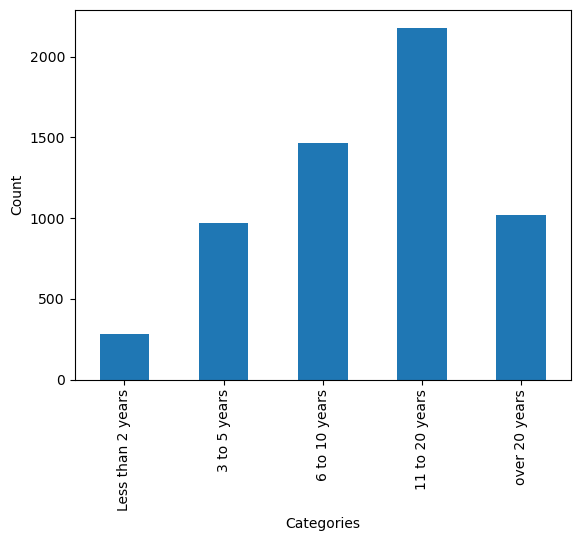

In [132]:
import matplotlib.pyplot as plt

desired_order = [
    'Less than 2 years', 
    '3 to 5 years',
    '6 to 10 years', 
    '11 to 20 years', 
    'over 20 years', 
    ]

df['TmLLgrpB'].value_counts().reindex(desired_order).plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [ ]:
years_owned = {
    'Less than 2 years': 1,  # assuming an average of 1 year
    '3 to 5 years': 4,  # assuming an average of 4 years
    '6 to 10 years': 8,  # assuming an average of 8 years
    '11 to 20 years': 13,  # skewed lower from 15 years
    'over 20 years': 22,  # skewed lower from 25 years
    }

In [130]:
df['TmLLgrpB'].unique()

['11 to 20 years', '6 to 10 years', NaN, 'over 20 years', 'Less than 2 years', '3 to 5 years']
Categories (5, object): ['11 to 20 years', '3 to 5 years', '6 to 10 years', 'Less than 2 years', 'over 20 years']

Putting the important vars into a new df

In [103]:
df_test = df[[
    'LLCat1',
    'TmLLgrpB',
    # 'LTVgrpA',
    # 'LTVgrpA_estimated',
    'Debt_estimated',
    # 'NumPrpgrp',
    # 'NumPrpgrp_estimated',
    'Num_prp_estimated',
    # 'ValperPrpA',
    'ValperPrpA_estimated',
    # 'MktValgrpA',
    # 'MktValgrpA_estimated',
    'mkt_val_est_result',
    # 'mkt_val_difference',
    'sdlt_estimated'
]]

In [111]:
df_test = df_test[df['mkt_val_difference'].notna()]
df_test['Debt_estimated'] = df_test['Debt_estimated'].fillna(0)

In [34]:
def calculate_stlt(prop_val, num_prps):
    if prop_val <= 250_000:
        sdlt = prop_val * 0.03
    elif prop_val <= 925_000:
        sdlt = 250_000 * 0.03 + \
            (prop_val - 250_000) * 0.08
    elif prop_val <= 1_500_000:
        sdlt = 250_000 * 0.03 + \
            675_000 * 0.08 + \
            (prop_val - 925_000) * 0.13
    else:
        sdlt = 250_000 * 0.03 + \
            675_000 * 0.08 + \
            925_000 * 0.13 + \
            (prop_val - 1_500_000) * 0.15
    
    sdlt_total = sdlt * num_prps
    
    return sdlt_total

In [36]:
calculate_stlt(500000, 1)

27500.0

## New Tgt Market

In [242]:
tgt_mkt = df[(df["LLCat1"].isin(['As an individual or group of individuals', 'Other (please specify)']))]
tgt_len = len(tgt_mkt.index)
df_len = len(df[(df["LLCat1"].notna())].index)

print(f" Target market: {tgt_len} \n Total market: {df_len} \n Percentage of total market: {round((tgt_len/df_len)*100,2)}%")

 Target market: 6278 
 Total market: 6695 
 Percentage of total market: 93.77%


In [249]:
tgt_mkt_prps = tgt_mkt['Num_prp_estimated'].sum()
mkt_prps = df['Num_prp_estimated'].sum()

print(f" Target market: {tgt_mkt_prps} \n Total market: {mkt_prps} \n Percentage of total market: {round((tgt_mkt_prps/mkt_prps)*100,2)}%")

 Target market: 27321 
 Total market: 32429 
 Percentage of total market: 84.25%


In [251]:
tgt_mkt_val = tgt_mkt['mkt_val_est_result'].sum()
mkt_val = df['mkt_val_est_result'].sum()

print(f" Target market: {tgt_mkt_val} \n Total market: {mkt_val} \n Percentage of total market: {round((tgt_mkt_val/mkt_val)*100,2)}%")

 Target market: 5759930000.0 
 Total market: 6596535000.0 
 Percentage of total market: 87.32%


In [252]:
df.sample(20)

,serial_2,LLCat1,LLeth2cat,Age4cat,ValperPrpA,MktValgrpA,BTL,LnperPrpA,LnValgrpA,LTVgrpA,...,LetReq03,NumPrpgrp_estimated,ValperPrpA_estimated,MktValgrpA_estimated,LTVgrpA_estimated,Num_prp_estimated,Debt_estimated,mkt_val_est_result,mkt_val_difference,num_prp_difference
2245,100641,As an individual or group of individuals,White,35-44,"£200,000 to £499,999","£500,000 to £999,999",Buy to let landlord,"£150,000 and over","£400,000 to £499,999",50 to 59%,...,"Yes, I have done this",3.0,350000.0,750000.0,0.55,2,412500.0,700000.0,0.066667,-0.333333
3417,107024,As an individual or group of individuals,White,45 to 64,"£80,000 to £99,999","£1,000,000 to £1,999,999",Buy to let landlord,"£50,000 to £69,999","£500,000 to £999,999",60 to 69%,...,"Yes, I have done this",17.0,90000.0,1500000.0,0.65,16,975000.0,1440000.0,0.040000,-0.058824
6805,106896,As an individual or group of individuals,White,45 to 64,"£200,000 to £499,999","£4,000,000 to £4,999,999",Buy to let landlord,"£150,000 and over","£1,000,000 to £1,999,999",40 to 49%,...,"No, I haven’t done this",17.0,350000.0,4500000.0,0.45,12,2025000.0,4200000.0,0.066667,-0.294118
2113,107679,As an individual or group of individuals,White,65 and over,"£200,000 to £499,999","£200,000 to £499,999",Buy to let landlord,"£150,000 and over","£100,000 to £199,999",40 to 49%,...,"Yes, I have done this",1.0,350000.0,350000.0,0.45,1,157500.0,350000.0,0.000000,0.000000
4144,100488,As an individual or group of individuals,NaN,45 to 64,"£180,000 to £199,999","£1,000,000 to £1,999,999",Buy to let landlord,"£50,000 to £69,999","£300,000 to £399,999",20 to 29%,...,"Yes, I have done this",7.0,190000.0,1500000.0,0.25,7,375000.0,1330000.0,0.113333,0.000000
27,105406,As an individual or group of individuals,White,65 and over,"£200,000 to £499,999","£200,000 to £499,999",no loan or borrowing,NaN,NaN,0%,...,"Yes, I have done this",1.0,350000.0,350000.0,0.00,1,0.0,350000.0,0.000000,0.000000
4575,106554,As an individual or group of individuals,NaN,18-34,"£150,000 to £179,999","£1,000,000 to £1,999,999",Buy to let landlord,"£50,000 to £69,999","£500,000 to £999,999",40 to 49%,...,"Yes, I have done this",17.0,165000.0,1500000.0,0.45,9,675000.0,1485000.0,0.010000,-0.470588
988,102578,As an individual or group of individuals,White,45 to 64,"£500,000 and over","£500,000 to £999,999",Buy to let landlord,"£120,000 to £149,999","£100,000 to £199,999",20 to 29%,...,"Yes, I have done this",1.0,600000.0,750000.0,0.25,1,187500.0,600000.0,0.200000,0.000000
4157,100007,As an individual or group of individuals,White,45 to 64,"£100,000 to £129,999","£1,000,000 to £1,999,999",Buy to let landlord,"£70,000 to £99,999","£1,000,000 to £1,999,999",80 to 89%,...,"Yes, I have done this",17.0,115000.0,1500000.0,0.85,13,1275000.0,1495000.0,0.003333,-0.235294
7222,106962,As part of a company,NaN,NaN,NaN,"less than £100,000",no loan or borrowing,NaN,NaN,0%,...,"Yes, I have done this",NaN,NaN,50000.0,0.00,0,0.0,NaN,NaN,NaN


## Better estimates

- NumPrpgrp
- ValperPrpA
- MktValgrpA
- LTVgrpA

In [149]:
df['MktValgrpA'].unique()

['£100,000 to £199,999', '£500,000 to £999,999', '£200,000 to £499,999', '£1,000,000 to £1,999,999', '£2,000,000 to £2,999,999', ..., 'less than £100,000', '£4,000,000 to £4,999,999', '£3,000,000 to £3,999,999', '£6,000,000 or more', '£5,000,000 to £5,999,999']
Length: 11
Categories (10, object): ['less than £100,000', '£1,000,000 to £1,999,999', '£100,000 to £199,999', '£2,000,000 to £2,999,999', ..., '£4,000,000 to £4,999,999', '£5,000,000 to £5,999,999', '£500,000 to £999,999', '£6,000,000 or more']

In [153]:
lower_bound_mapping = {
    '1 only': 1,
    '2 to 4': 2,
    '5 to 9': 5,
    '10 to 24': 10,
    '25 to 100': 25,
    'more than 100': 101  # Assuming 101 as a representative value for 'more than 100'
}

upper_bound_mapping = {
    '1 only': 1,
    '2 to 4': 4,
    '5 to 9': 9,
    '10 to 24': 24,
    '25 to 100': 100,
    'more than 100': np.inf
}

df['NumPrpgrp_LowerBound'] = df['NumPrpgrp'].map(lower_bound_mapping)
df['NumPrpgrp_UpperBound'] = df['NumPrpgrp'].map(upper_bound_mapping)

In [154]:
lower_bound_mapping = {
    '£130,000 to £149,999': 130000,
    '£500,000 and over': 500000,
    '£200,000 to £499,999': 200000,
    '£150,000 to £179,999': 150000,
    '£100,000 to £129,999': 100000,
    '£180,000 to £199,999': 180000,
    'up to £49,999': 0,  # Assuming 0 as a representative value for 'up to £49,999'
    '£50,000 to £79,999': 50000,
    '£80,000 to £99,999': 80000
}

upper_bound_mapping = {
    '£130,000 to £149,999': 149999,
    '£500,000 and over': np.inf,
    '£200,000 to £499,999': 499999,
    '£150,000 to £179,999': 179999,
    '£100,000 to £129,999': 129999,
    '£180,000 to £199,999': 199999,
    'up to £49,999': 49999,
    '£50,000 to £79,999': 79999,
    '£80,000 to £99,999': 99999
}

df['ValperPrpA_UpperBound'] = df['ValperPrpA'].map(upper_bound_mapping)
df['ValperPrpA_LowerBound'] = df['ValperPrpA'].map(lower_bound_mapping)


In [155]:
lower_bound_mapping = {
    '£100,000 to £199,999': 100000,
    '£500,000 to £999,999': 500000,
    '£200,000 to £499,999': 200000,
    '£1,000,000 to £1,999,999': 1000000,
    '£2,000,000 to £2,999,999': 2000000,
    'less than £100,000': 0,  # Assuming 0 as a representative value for 'less than £100,000'
    '£4,000,000 to £4,999,999': 4000000,
    '£3,000,000 to £3,999,999': 3000000,
    '£6,000,000 or more': 6000000,
    '£5,000,000 to £5,999,999': 5000000
}

upper_bound_mapping = {
    '£100,000 to £199,999': 199999,
    '£500,000 to £999,999': 999999,
    '£200,000 to £499,999': 499999,
    '£1,000,000 to £1,999,999': 1999999,
    '£2,000,000 to £2,999,999': 2999999,
    'less than £100,000': 99999,
    '£4,000,000 to £4,999,999': 4999999,
    '£3,000,000 to £3,999,999': 3999999,
    '£6,000,000 or more': np.inf,
    '£5,000,000 to £5,999,999': 5999999
}

df['MktValgrpA_LowerBound'] = df['MktValgrpA'].map(lower_bound_mapping)
df['MktValgrpA_UpperBound'] = df['MktValgrpA'].map(upper_bound_mapping)

In [156]:
df.head()

,serial_2,LLCat1,LLeth2cat,Age4cat,ValperPrpA,MktValgrpA,BTL,LnperPrpA,LnValgrpA,LTVgrpA,...,TaxB307,EPCEFG,EPCE,LetReq03,NumPrpgrp_LowerBound,NumPrpgrp_UpperBound,ValperPrpA_UpperBound,ValperPrpA_LowerBound,MktValgrpA_LowerBound,MktValgrpA_UpperBound
0,101638,As an individual or group of individuals,White,65 and over,"£130,000 to £149,999","£100,000 to £199,999",no loan or borrowing,NaN,NaN,NaN,...,NaN,Yes,I was not aware of this at all,"Yes, I have done this",1,1.0,149999.0,130000,100000,199999.0
1,101586,As an individual or group of individuals,White,65 and over,"£500,000 and over","£500,000 to £999,999",no loan or borrowing,NaN,NaN,NaN,...,Yes,No,I was not aware of this at all,"Yes, I have done this",1,1.0,inf,500000,500000,999999.0
2,105848,As an individual or group of individuals,White,35-44,"£200,000 to £499,999","£200,000 to £499,999",Buy to let landlord,"£30,000 to £49,999","less than £100,000",10 to 19%,...,No,No,I was not aware of this at all,"Yes, I have done this",1,1.0,499999.0,200000,200000,499999.0
3,106053,As an individual or group of individuals,White,65 and over,"£200,000 to £499,999","£200,000 to £499,999",no loan or borrowing,NaN,NaN,NaN,...,NaN,No,I was not aware of this at all,"Yes, I have done this",1,1.0,499999.0,200000,200000,499999.0
4,104202,Other (please specify),NaN,NaN,"£500,000 and over","£500,000 to £999,999",no loan or borrowing,NaN,NaN,NaN,...,No,No,I was aware of it and fully understood the det...,"Yes, I have done this",1,1.0,inf,500000,500000,999999.0
